<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
None
               SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000
Coefficients: [0.0014687]
Intercept: 0.6258624722253536
Residual Sum of Squares (RSS): 0.892263745858133
Coefficient of Determination (R^2): 0.46949246374602127


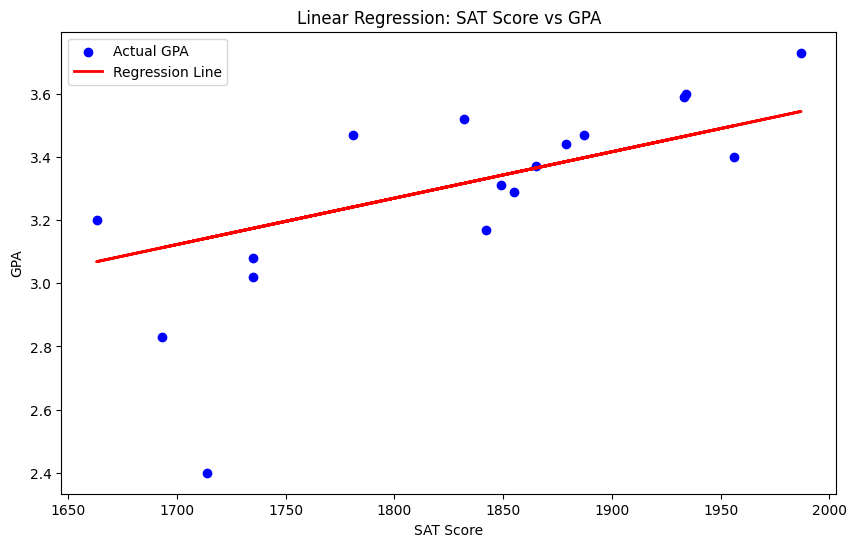

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('SAT.csv')

# Display basic info to check for categorical data or scaling needs
print(data.info())
print(data.describe())

# Assuming the columns are 'SAT' for SAT score and 'GPA' for GPA
X = data[['SAT']]  # Feature: SAT score
y = data['GPA']    # Target: GPA

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
coefficients = model.coef_
intercept = model.intercept_
rss = np.sum((y_test - y_pred) ** 2)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Residual Sum of Squares (RSS): {rss}')
print(f'Coefficient of Determination (R^2): {r2}')

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual GPA')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.title('Linear Regression: SAT Score vs GPA')
plt.legend()
plt.show()
